In [ ]:
import pandas as pd

df=pd.read_csv('/content/wine.data')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
X=df.iloc[:,: -1]
y=df.iloc[:-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

X=scaler.transform(X)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X=pca.fit_transform(X)

In [ ]:
X

array([[-2.37934546, -0.48651782, -1.94547144, ...,  0.37958568,
         0.20031432,  0.11587188],
       [-2.46980672,  1.15254781,  0.87974023, ...,  0.04456925,
        -0.10519054, -0.15784661],
       [-3.25443802,  2.72693455, -0.42849282, ..., -0.17201594,
         0.33667274, -0.18618135],
       ...,
       [ 3.39147844,  2.23007312, -1.11991418, ...,  0.76007925,
        -0.19327138, -0.06973074],
       [ 3.08350857,  1.7688997 , -0.62866151, ...,  0.38306677,
         0.10335362,  0.04733305],
       [ 3.64104401,  2.63749946,  0.7362057 , ..., -0.24757129,
         0.23688816, -0.16455976]])

In [ ]:
print(pca.explained_variance_ratio_)

[0.39799157 0.16751901 0.1096897  0.06903067 0.06570075 0.05171142
 0.04256357 0.02698209 0.02023027 0.01979745 0.01305653 0.01039688
 0.00533008]


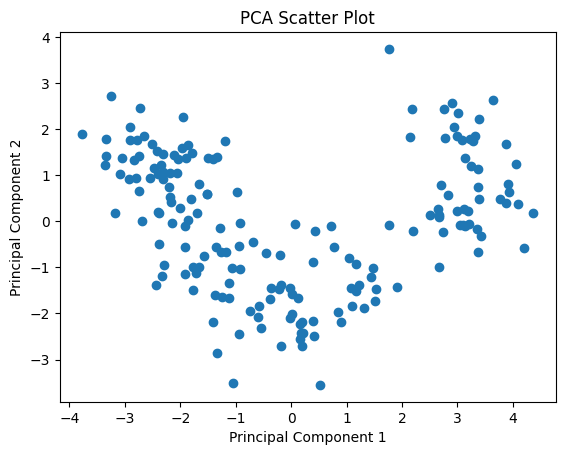

In [ ]:
import matplotlib.pyplot as plt

# Assuming pca_transformed_data is the transformed data using PCA
pca_transformed_data = X 

# Take the first two components
component1 = pca_transformed_data[:, 0]
component2 = pca_transformed_data[:, 1]

# Create the scatter plot
plt.scatter(component1, component2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


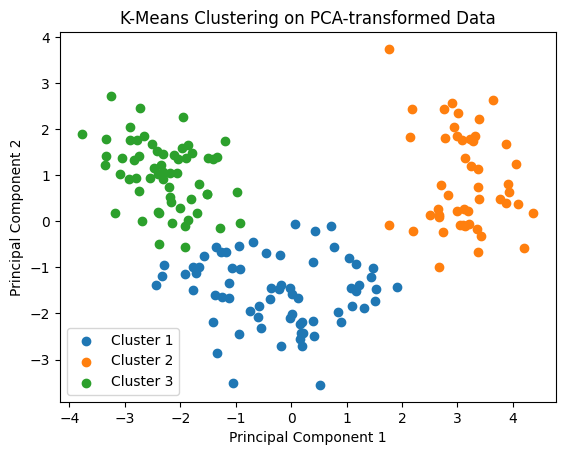

In [ ]:
from sklearn.cluster import KMeans

# Assuming pca_transformed_data is the transformed data using PCA
pca_transformed_data = X  # Replace [...] with your actual transformed data

# Create a K-Means clustering object with the desired number of clusters
num_clusters = 3  # Adjust the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fit the K-Means model to the transformed data
kmeans.fit(pca_transformed_data)

# Obtain the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)

import matplotlib.pyplot as plt


# Create a scatter plot for each cluster
for cluster in range(num_clusters):
    cluster_data = pca_transformed_data[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

# Add labels and title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-transformed Data')
plt.legend()
plt.show()



The cluster labels indicate the assignment of each data point to a specific cluster obtained from the clustering analysis using K-Means algorithm on the PCA-transformed data. The cluster labels range from 0 to 2, representing three different clusters.

To interpret the results, we can analyze the characteristics of each cluster based on the assigned labels. Let's go through each cluster:

- Cluster 0: This cluster contains a majority of the data points, indicated by the repeated label 0. It suggests that these data points share similar features or patterns that differentiate them from the other clusters. It's worth examining the specific characteristics of these data points to understand the underlying factors that led to their grouping.

- Cluster 1: This cluster consists of data points labeled as 1. These data points exhibit distinct characteristics or patterns that differentiate them from the other clusters. By analyzing the specific features of these data points, you can gain insights into the unique properties or behaviors they represent.

- Cluster 2: This cluster includes data points assigned the label 2, and it is the smallest cluster in this case. The presence of this cluster indicates that there is a subset of data points that are different from the majority. Analyzing the distinguishing features of this cluster can provide valuable information about the specific traits or behaviors that set these data points apart from others.

It's important to note that the interpretation of the cluster labels depends on the specific context and the nature of the dataset. Further analysis and domain knowledge are often necessary to understand the meaning and implications of the clusters. Additionally, it may be helpful to examine the original features of the data points within each cluster to gain a deeper understanding of the patterns and relationships uncovered by the clustering analysis.

Regarding the PCA analysis, the clustering was performed on the PCA-transformed data, indicating that the transformed principal components were used to group the data points into clusters. The PCA analysis likely helped in reducing the dimensionality of the data and capturing the most significant variations, enabling a more efficient clustering process and potentially revealing underlying patterns in the dataset.